In [27]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Reshape
from keras.layers.normalization import BatchNormalization
from keras.datasets import mnist
from keras.utils import np_utils
import coremltools
from keras import backend as K
import keras


# Load mnist data

In [42]:
from keras.datasets import mnist
def mnist_data():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()

    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255
    
    Y_train = np_utils.to_categorical(y_train, 10)
    Y_test = np_utils.to_categorical(y_test, 10)
    
    X_train = X_train.reshape([-1, 28, 28, 1])
    X_test  = X_test.reshape([-1, 28, 28, 1])
    return (X_train, Y_train), (X_test, Y_test)

# Better alternative:

In [ ]:
from keras.utils import np_utils

num_classes = 10

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:num_classes])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

# print first ten (one-hot) training labels
print('One-hot labels:')

In [57]:
from keras.datasets import mnist
from keras import backend as K

def mnist_data():
    # input image dimensions
    img_rows, img_cols = 28, 28
    (X_train, Y_train), (X_test, Y_test) = mnist.load_data()

    if K.image_data_format() == 'channels_first':
        X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
        X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
        X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    # rescale [0,255] --> [0,1]
    X_train = X_train.astype('float32')/255
    X_test = X_test.astype('float32')/255

    # tranform to one hot encoding
    Y_train = np_utils.to_categorical(Y_train, 10)
    Y_test = np_utils.to_categorical(Y_test, 10)

    return (X_train, Y_train), (X_test, Y_test)

(X_train, Y_train), (X_test, Y_test) = mnist_data()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Visualize the first 6

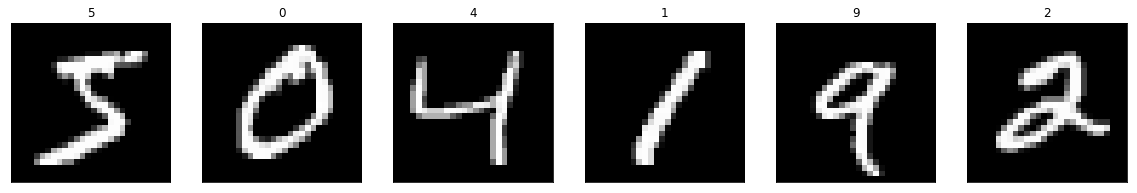

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# plot first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))


# View image in detail

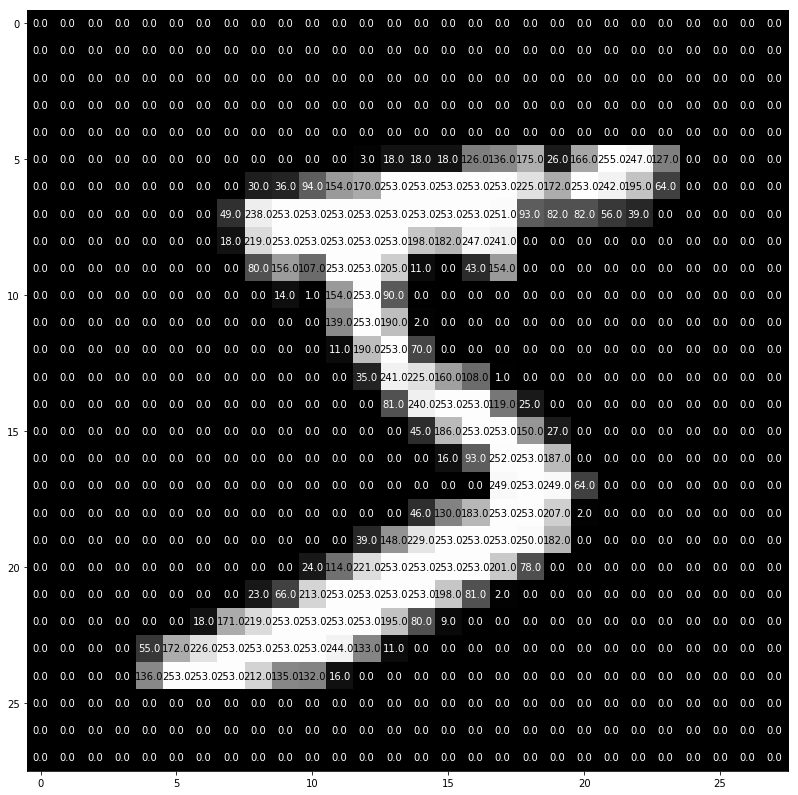

In [9]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (14,14)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)


# Define network

In [10]:
def network():
    model = Sequential()

    model.add(Flatten(input_shape=(28, 28, 1, )))
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    return model

In [58]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
def network():
    # define the model
    model = Sequential()
    input_shape = (28, 28, 1)
    num_classes = 10

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))

    # summarize the model
    #model.summary()
    #keras.utils.plot_model(model, to_file='model.png')
    return model 


(X_train, Y_train), (X_test, Y_test) = mnist_data()
#model.summary()
model = network()


# Train network

In [59]:
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

#model.fit(X_train, Y_train, batch_size=100, nb_epoch=1)
model.fit(X_train, Y_train, batch_size=512, epochs=6, verbose=1,validation_data=(X_test, Y_test))


score = model.evaluate(X_test, Y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/6
60000/60000 [==============================] - 35s 584us/step - loss: 0.8051 - acc: 0.7315 - val_loss: 0.2254 - val_acc: 0.9313
Epoch 2/6
60000/60000 [==============================] - 36s 594us/step - loss: 0.2005 - acc: 0.9377 - val_loss: 0.0883 - val_acc: 0.9710
Epoch 3/6
60000/60000 [==============================] - 34s 563us/step - loss: 0.1382 - acc: 0.9566 - val_loss: 0.0618 - val_acc: 0.9798
Epoch 4/6
60000/60000 [==============================] - 33s 544us/step - loss: 0.1157 - acc: 0.9635 - val_loss: 0.0539 - val_acc: 0.9825
Epoch 5/6
60000/60000 [==============================] - 35s 583us/step - loss: 0.0947 - acc: 0.9704 - val_loss: 0.0488 - val_acc: 0.9852
Epoch 6/6
60000/60000 [==============================] - 35s 583us/step - loss: 0.0851 - acc: 0.9741 - val_loss: 0.0406 - val_acc: 0.9860
('Test loss:', 0.04062922116960399)
('Test accuracy:', 0.986)


# Convert the model to coreml

In [170]:
coreml_model = coremltools.converters.keras.convert(model,
                                                    input_names="image",
                                                    image_input_names='image',
                                                    class_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
                                                    )

0 : conv2d_25_input, <keras.engine.topology.InputLayer object at 0x11d2928d0>
1 : conv2d_25, <keras.layers.convolutional.Conv2D object at 0x12a173890>
2 : conv2d_25__activation__, <keras.layers.core.Activation object at 0x11c58a210>
3 : max_pooling2d_25, <keras.layers.pooling.MaxPooling2D object at 0x123e576d0>
4 : conv2d_26, <keras.layers.convolutional.Conv2D object at 0x12a157410>
5 : conv2d_26__activation__, <keras.layers.core.Activation object at 0x11e6dc190>
6 : max_pooling2d_26, <keras.layers.pooling.MaxPooling2D object at 0x12a173e90>
7 : conv2d_27, <keras.layers.convolutional.Conv2D object at 0x11d43b210>
8 : conv2d_27__activation__, <keras.layers.core.Activation object at 0x11e6dc490>
9 : max_pooling2d_27, <keras.layers.pooling.MaxPooling2D object at 0x11d43bed0>
10 : flatten_13, <keras.layers.core.Flatten object at 0x11db10990>
11 : dense_28, <keras.layers.core.Dense object at 0x11db57c50>
12 : dense_28__activation__, <keras.layers.core.Activation object at 0x11e6dcb90>
13 : 

# Add metadata to the model

In [171]:
coreml_model.author = 'plotti'
coreml_model.license = 'MIT'
coreml_model.short_description = 'MNIST handwriting recognition with a 3 layer network'
coreml_model.input_description['image'] = '28x28 grayscaled pixel values between 0-1'
coreml_model.save('SimpleMnist.mlmodel')

print(coreml_model)

input {
  name: "image"
  shortDescription: "28x28 grayscaled pixel values between 0-1"
  type {
    imageType {
      width: 28
      height: 28
      colorSpace: GRAYSCALE
    }
  }
}
output {
  name: "output1"
  type {
    dictionaryType {
      stringKeyType {
      }
    }
  }
}
output {
  name: "classLabel"
  type {
    stringType {
    }
  }
}
predictedFeatureName: "classLabel"
predictedProbabilitiesName: "output1"
metadata {
  shortDescription: "MNIST handwriting recognition by 3-layered neural network"
  author: "plotti"
  license: "MIT"
}



# Apply it to an Image

{u'classLabel': u'3', u'output1': {u'1': 0.0, u'0': 0.0, u'3': 1.0, u'2': 0.0, u'5': 0.0, u'4': 0.0, u'7': 0.0, u'6': 0.0, u'9': 0.0, u'8': 0.0}}


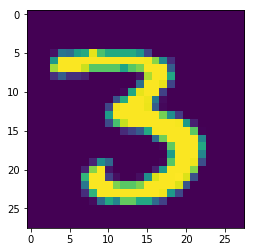

In [172]:
from PIL import Image  
import numpy as np
model =  coremltools.models.MLModel('SimpleMnist.mlmodel')
im = Image.fromarray((np.reshape(mnist_data()[0][0][12]*255, (28, 28))).astype(np.uint8),"L")
#im = Image.fromarray(mnist_data()[0][0][1].reshape(28,28).astype(np.float32), 'L')
plt.imshow(im)
predictions = model.predict({'image': im})
print(predictions)

{u'classLabel': u'3', u'output1': {u'1': 0.0, u'0': 0.0, u'3': 1.0, u'2': 0.0, u'5': 0.0, u'4': 0.0, u'7': 0.0, u'6': 0.0, u'9': 0.0, u'8': 0.0}}


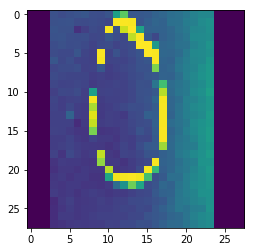

In [175]:
#im = Image.open("7.JPG") #7
#im = Image.open("IMG_0181.JPG") #5
#im = Image.open("IMG_5349.JPG") #1
#im = Image.open("IMG_9925.JPG") #4
im = Image.open("IMG_4057.JPG") #0

from PIL import ImageEnhance
#im = ImageEnhance.Contrast(im).enhance(2.0)
from PIL import ImageFilter

size = 28, 28
#im.thumbnail(size)
im = im.rotate(-90)
im = im.resize(size)
im = im.convert("L")
#im = im.filter(ImageFilter.MaxFilter(3))
#im.crop((0,0,28,28))
plt.imshow(im)
predictions = model.predict({'image': im})

print(predictions)